Epoch 1/200
38/38 [==============================] - 4s 14ms/step - loss: 591.5242 - val_loss: 656.8640
Epoch 2/200
38/38 [==============================] - 0s 5ms/step - loss: 550.4905 - val_loss: 591.7360
Epoch 3/200
38/38 [==============================] - 0s 5ms/step - loss: 466.8753 - val_loss: 473.6041
Epoch 4/200
38/38 [==============================] - 0s 5ms/step - loss: 348.0451 - val_loss: 337.6757
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 235.4626 - val_loss: 231.1676
Epoch 6/200
38/38 [==============================] - 0s 5ms/step - loss: 162.7629 - val_loss: 170.0941
Epoch 7/200
38/38 [==============================] - 0s 5ms/step - loss: 128.6976 - val_loss: 144.6420
Epoch 8/200
38/38 [==============================] - 0s 5ms/step - loss: 117.0536 - val_loss: 135.3252
Epoch 9/200
38/38 [==============================] - 0s 6ms/step - loss: 112.9105 - val_loss: 130.8041
Epoch 10/200
38/38 [==============================] - 0s 5ms/step - loss

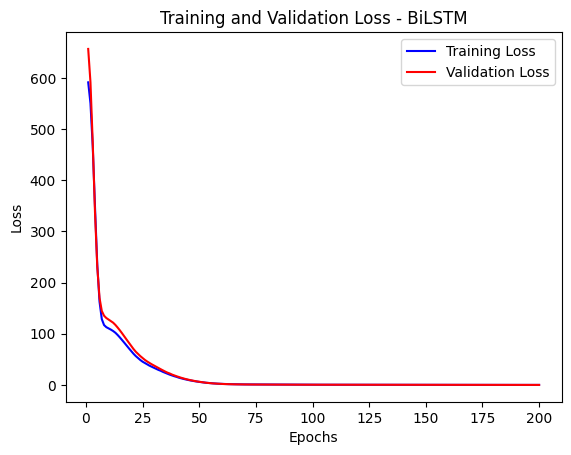

10/10 [==============================] - 0s 3ms/step


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a CSV file named 'energy_data.csv'
data = pd.read_csv('https://raw.githubusercontent.com/sbkowshik/energy-consumption-prediction/main/Household_electricity_dataset.csv')

# Preprocessing
# Extracting features and target variable
X = data.drop(columns=['Value']).values
X = data.drop(columns=['Date'])
y = data['Value'].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape features for LSTM input [samples, time steps, features]
n_features = X.shape[1]  # Number of features
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='relu'), input_shape=(1, n_features)))
model.add(Dense(1))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
history=model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, validation_data=(X_test, y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss - BiLSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# You can further analyze the predictions and evaluate the model as needed


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared value
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)


Mean Absolute Error (MAE): 0.1256656107845784
Root Mean Squared Error (RMSE): 0.18129659694978092
R-squared: 0.9998154397360823


In [8]:

# Assuming y_test and predictions are already defined
y_test_flattened = y_test.flatten()
y_pred_flattened = predictions.flatten()

# Define a threshold for accuracy (e.g., within +/- 5%)
threshold = 0.05

# Calculate absolute percentage error
absolute_percentage_error = np.abs((y_test_flattened - y_pred_flattened) / y_test_flattened)

# Calculate accuracy based on the threshold
accuracy = np.mean(absolute_percentage_error <= threshold)

print("Accuracy (within +/- 5%):", accuracy)

Accuracy (within +/- 5%): 0.9866666666666667


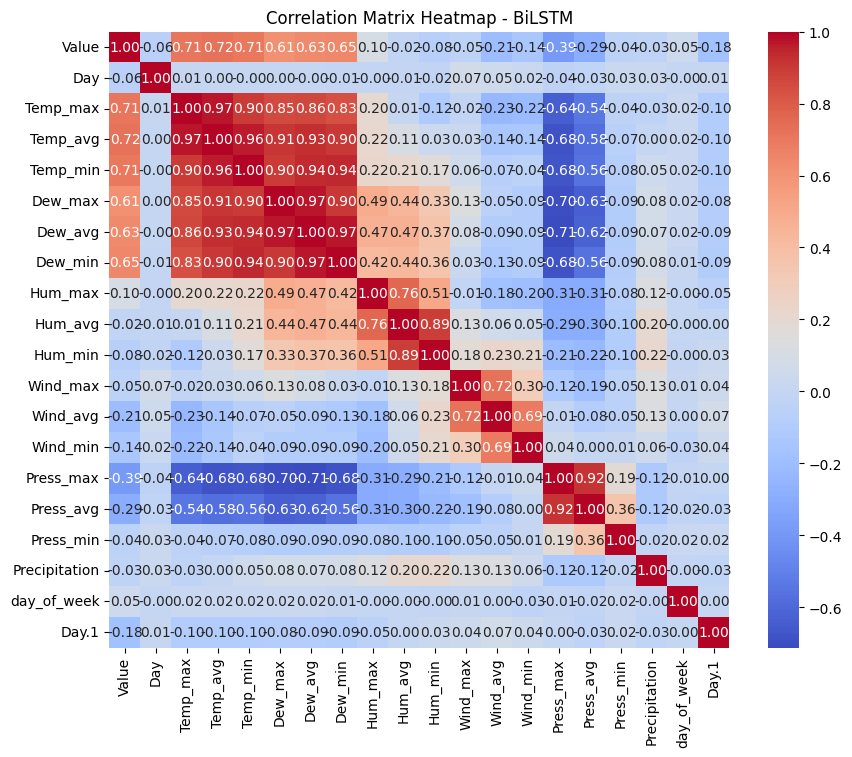

In [11]:
import seaborn as sns

corr_matrix = data.drop(columns=['Date']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap - BiLSTM')
plt.show()